### LOAD DATA

In [ ]:
import pandas as pd
transport = pd.read_csv('STAGE_2_Transport_2.csv')

In [ ]:
# Avoid the wrong calculate in 'Month' when do the aggregrate
transport[["Month"]] = transport[["Month"]].astype(str)

In [ ]:
transport.head()

Year Month         Bus      Ferry  Light rail       Train         All
0  2019     1  22040138.0  1619996.0    625233.0  29925564.0  54210931.0
1  2019     2  25713814.0  1266715.0    888350.0  32218764.0  60087643.0
2  2019     3  28742223.0  1300757.0   1010066.0  36530266.0  67583312.0
3  2019     4  24442222.0  1432483.0    905526.0  32810678.0  59590909.0
4  2019     5  28499242.0  1179849.0    912170.0  37562121.0  68153382.0

### GROUP-AGGREGRATE SUMMARY

In [ ]:
G_T = transport.groupby('Year').mean()
G_T = G_T.rename_axis('Year').reset_index()

In [ ]:
G_T

Year           Bus         Ferry    Light rail         Train           All
0  2019  2.570809e+07  1.296044e+06  9.808752e+05  3.359704e+07  6.158205e+07
1  2020  1.459663e+07  5.651720e+05  1.165462e+06  1.721989e+07  3.354715e+07
2  2021  1.129827e+07  4.499539e+05  1.227805e+06  1.357711e+07  2.655314e+07

### VISUALIZATION

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

#### Chart1- line plot

Text(0.5, 1.0, 'Line plot of Each years trips of all traffic tools from 2019 to 2021\n')

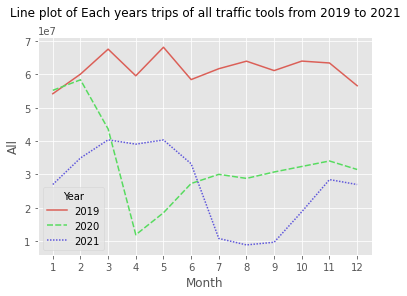

In [ ]:
sns.lineplot(data=transport, x="Month",y="All",hue="Year",style = "Year", 
             palette=sns.color_palette("hls",3))
plt.title("Line plot of Each years trips of all traffic tools from 2019 "+
          "to 2021\n", fontsize = 12)

Summary: We want to highlight the impact of Covid on Transport, so I choose to use lineplot here. 
Using lines with different colors to represent the year as legend, so that we can clearly compare 
the difference between different years. I use month as x-label and sum of all types of tools 
as y-label to analysis the trend of each year. Also add titles to give the stake holder a 
description of the topic, grids are also added to increase the numerical accuracy, 
when compare over axis ticks as thresholds.

It is clear that all tools'trips had a near-cliff fall between February and April 2020,
at the height of the COVID-19 outbreak in NSW. Although it started to recover somewhat in 2021, 
the increase in the epidemic situation is not optimistic. In contrast, trips in 2019 was much 
higher than in 2020 and 2021, so it's easy to see that the profit of transport in NSW had been
seriously affected.

#### Chart2- baxplot

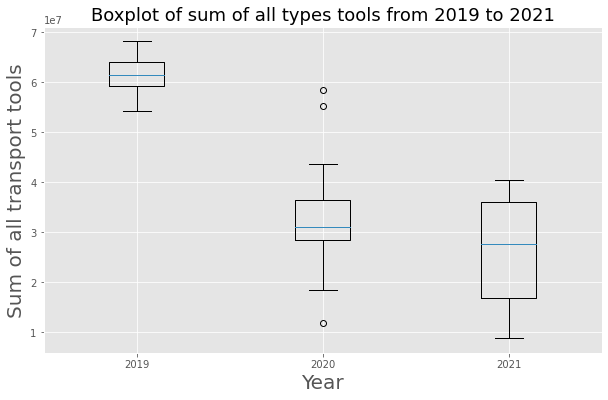

In [ ]:
All_2019 = transport[transport['Year']== 2019 ]['All']
All_2020 = transport[transport['Year']== 2020 ]['All']
All_2021 = transport[transport['Year']== 2021 ]['All']

plt.figure(figsize=(10,6))
plt.title('Boxplot of sum of all types tools from 2019 to 2021', fontsize = 18)
labels = '2019', '2020', '2021'


plt.boxplot([All_2019, All_2020, All_2021], labels = labels)
plt.xlabel("Year",fontsize = 20)
plt.ylabel("Sum of all transport tools",fontsize = 20)
plt.show()


In [ ]:
transport[['Year','All']].groupby('Year').agg(['mean','median']).\
sort_values(by=('All','mean'))

All            
              mean      median
Year                          
2021  2.655314e+07  27731776.5
2020  3.354715e+07  31123858.0
2019  6.158205e+07  61437308.5

Summary: I chose boxplot here to represent the range and median of the data. We can 
see that the average transport tools use in 2019 was the highest in the three years, 
and there were no outliers, indicating that at that time, there was no Covid 
and everything was normal.

However, there was a significant decline in 2020 compared 
with 2019, even outliers, indicating that there was no serious Covid in NSW at the 
beginning of 2019. However, the emergence of Covid led to a sharp decline in the 
number of people who chose to use Publib Tools, so there would be outliers 
higher or lower than the box range.

The number of trips in 2021 is still not improved, but the data records of the whole 
year is relatively average, and there is no outlier. It can be concluded that the whole 
year of 2021 is a relatively low year in the public transport tools industry.